### Student Information
Name:郭又維

Student ID:113033627

GitHub ID:zx23422864

Kaggle name:zx23422864

Kaggle private scoreboard snapshot:
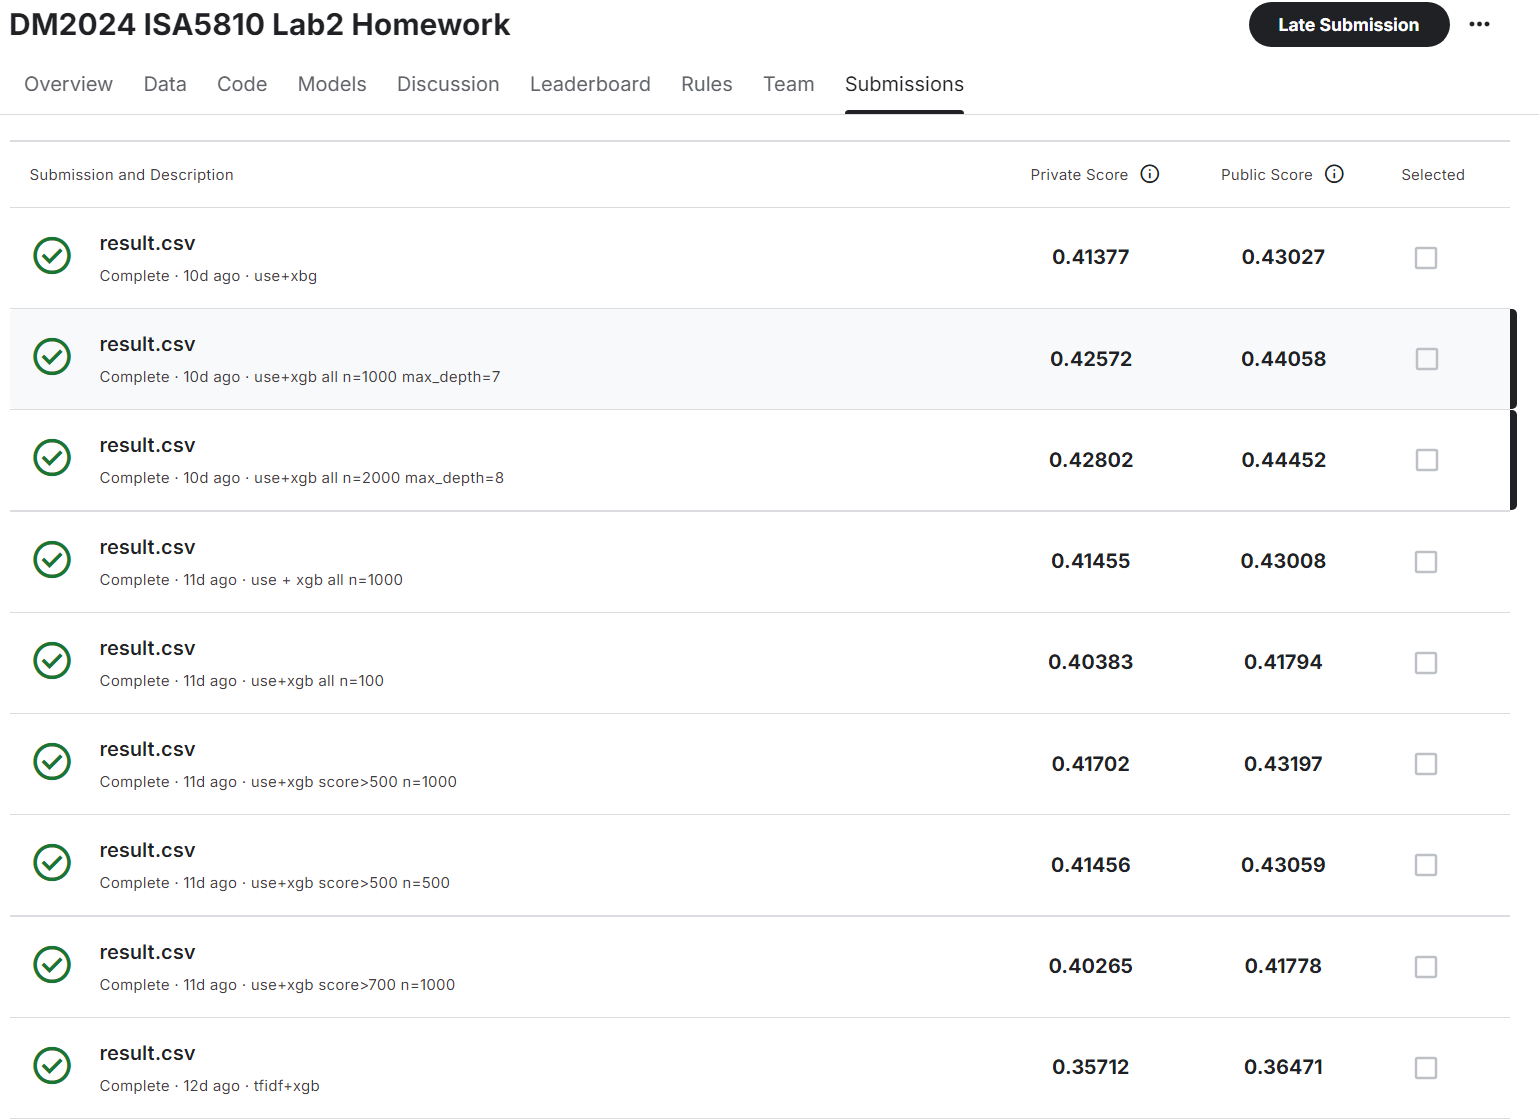

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

try 1, use bow embedding and decisiontreemodel 


In [2]:
### Begin Assignment Here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# data preprocessing

# data_raw = pd.read_json('tweets_DM.json', lines=True)
# data_raw_emotion = pd.read_csv('emotion.csv')
# data_raw_identification = pd.read_csv('data_identification.csv')
# data = pd.DataFrame()
# data['tweet_id'] = data_raw['_source'].apply(lambda x: x['tweet']['tweet_id'])
# data['tweet_text'] = data_raw['_source'].apply(lambda x: x['tweet']['text'])
# data['hashtags'] = data_raw['_source'].apply(lambda x: x['tweet']['hashtags'])
# data['score'] = data_raw['_score']
# data = pd.merge(data, data_raw_identification, on='tweet_id', how='left')
# data = pd.merge(data, data_raw_emotion, on='tweet_id', how='left')

# data.to_csv('data.csv', index=False)

data = pd.read_csv('data.csv')


#### test1 bow and decisiontree

In [ ]:
# 由於資料數量很多，所以我只取出分數大於800的資料，不過其實我也不知道這score是什麼

train_df = data[data['identification'] == 'train']
train_df = train_df[train_df['score'] > 800]
test_df = data[data['identification'] == 'test']

In [5]:
train_df.shape

(318238, 6)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['tweet_text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['tweet_text'])

## check dimension
train_data_BOW_features_500.shape

c:\Users\530\anaconda3\envs\lab2\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(318238, 500)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train = BOW_500.transform(train_df['tweet_text'])
y_train = train_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

## accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.98


In [ ]:
## predict test data

all_train = data[data['identification'] == 'train']
all_x = BOW_500.transform(all_train['tweet_text'])
all_y = all_train['emotion']
y_all_pred = DT_model.predict(all_x)
acc_all = accuracy_score(y_true=all_y, y_pred=y_all_pred)
print('all data accuracy: {}'.format(round(acc_all, 2)))

all data accuracy: 0.52


In [95]:
X_test = BOW_500.transform(test_df['tweet_text'])
y_test_pred = DT_model.predict(X_test)

In [96]:
y_test_pred

array(['joy', 'anticipation', 'disgust', ..., 'joy', 'joy', 'joy'],
      dtype=object)

In [ ]:
## output result

result = pd.DataFrame()
result['id'] = test_df['tweet_id']
result['emotion'] = y_test_pred
result.to_csv('result.csv', index=False)


#### test2 tfidf for svm and xgboost

In [ ]:
data = pd.read_csv('data.csv')
data

# 由於資料數量很多，所以我只取出分數大於800的資料，不過其實我也不知道這score是什麼
train_df = data[data['identification'] == 'train']
train_df = train_df[train_df['score'] > 800]
test_df = data[data['identification'] == 'test']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk


# 使用 TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
tfidf_vectorizer.fit(train_df['tweet_text'])
X_train_tfidf = tfidf_vectorizer.transform(train_df['tweet_text'])
y_train = train_df['emotion']

c:\Users\530\anaconda3\envs\lab2\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#use svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


# build SVM model
SVM_model = LinearSVC(random_state=1)
SVM_model.fit(X_train_tfidf, y_train)
y_train_pred = SVM_model.predict(X_train_tfidf)
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.46


In [ ]:
# predict all data

all_train = data[data['identification'] == 'train']
all_x = tfidf_vectorizer.transform(all_train['tweet_text'])
all_y = all_train['emotion']
y_all_pred = SVM_model.predict(all_x)
acc_all = accuracy_score(y_true=all_y, y_pred=y_all_pred)
print('all data accuracy: {}'.format(round(acc_all, 2)))

all data accuracy: 0.46


In [ ]:
# predict test data

X_test = tfidf_vectorizer.transform(test_df['tweet_text'])
y_test_pred = SVM_model.predict(X_test)

result = pd.DataFrame()
result['id'] = test_df['tweet_id']
result['emotion'] = y_test_pred
result.to_csv('result.csv', index=False)

In [ ]:
#use xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['emotion'])

# build XGBoost model
XGB_model = XGBClassifier(random_state=42
                          , use_label_encoder=False
                          , objective='multi:softmax'
                          , eval_metric='mlogloss'
                          , n_estimators=1000
                          , learning_rate=0.1
                          , max_depth=8
                          , subsample=0.8
                          , colsample_bytree=0.8
                          , n_jobs=4
                          )
XGB_model.fit(X_train_tfidf, y_train)
y_train_pred = XGB_model.predict(X_train_tfidf)

acc_train = accuracy_score(y_train, y_train_pred)
print('XGBoost training accuracy:', round(acc_train, 3))

c:\Users\530\anaconda3\envs\lab2\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost training accuracy: 0.655


In [ ]:
# predict all data

all_train = data[data['identification'] == 'train']
all_x = tfidf_vectorizer.transform(all_train['tweet_text'])
all_y = all_train['emotion']
all_y_encoded = label_encoder.transform(all_y)
y_all_pred = XGB_model.predict(all_x)

acc_all = accuracy_score(all_y_encoded, y_all_pred)
print('XGBoost all data accuracy:', round(acc_all, 3))

XGBoost all data accuracy: 0.532


In [ ]:
# predict test data

X_test = tfidf_vectorizer.transform(test_df['tweet_text'])
y_test_pred = XGB_model.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred)

result = pd.DataFrame()
result['id'] = test_df['tweet_id']
result['emotion'] = y_test_pred
result.to_csv('result.csv', index=False)

#### test3 use+xgb

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf

# Load the Universal Sentence Encoder's TF Hub module
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
# Compute embeddings

train_df = data[data['identification'] == 'train']
train_df = train_df[train_df['score'] > 500]
test_df = data[data['identification'] == 'test']

In [ ]:
import tqdm

# batch embed
def batch_embed(texts, batch_size=640):
    embeddings = []
    for i in tqdm.tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i + batch_size]
        batch_embeddings = embed(batch_texts).numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)
X_train_embed = batch_embed(train_df['tweet_text'].tolist())

100%|██████████| 2275/2275 [01:10<00:00, 32.09it/s]


In [67]:
#use xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['emotion'])

XGB_model = XGBClassifier(random_state=42
                          , use_label_encoder=False
                          , objective='multi:softmax'
                          , eval_metric='mlogloss'
                          , n_estimators=500
                          , learning_rate=0.1
                          , max_depth=6
                          , subsample=1.0
                          , colsample_bytree=1.0
                          , n_jobs=4
                        
                          )
XGB_model.fit(X_train_embed, y_train)

c:\Users\530\anaconda3\envs\lab2\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=4, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# predict all data

y_train_pred = XGB_model.predict(X_train_embed)

acc_train = accuracy_score(y_train, y_train_pred)
print('XGBoost training accuracy:', round(acc_train, 3))

XGBoost training accuracy: 0.566


In [ ]:

# predict all data

all_train = data[data['identification'] == 'train']

all_x = batch_embed(all_train['tweet_text'].tolist())
all_y = all_train['emotion']
all_y_encoded = label_encoder.transform(all_y)
y_all_pred = XGB_model.predict(all_x)

acc_all = accuracy_score(all_y_encoded, y_all_pred)
print('XGBoost all data accuracy:', round(acc_all, 3))

100%|██████████| 2275/2275 [01:09<00:00, 32.62it/s]


XGBoost all data accuracy: 0.565


In [ ]:
# predict test data

X_test = batch_embed(test_df['tweet_text'].tolist())
y_test_pred = XGB_model.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred)

result = pd.DataFrame()
result['id'] = test_df['tweet_id']
result['emotion'] = y_test_pred
result.to_csv('result.csv', index=False)

100%|██████████| 644/644 [00:20<00:00, 30.69it/s]


third.
在這次作業中，我試了幾種不同的embeding方法與不同的分類方法，包含bow,tfidf,use，分類模型包含decisiontree, random forest, xgboost，也調了不同的參數，只是成果都沒有很好，最好的成績是使用use+xgboost的0.42802
，在這次作業中我學到很多。